In [1]:
import pandas as pd
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras

np.random.seed(42)
tf.random.set_seed(42)

df = pd.read_csv("emnist-letters.csv")

X = df.iloc[:,1:].to_numpy().reshape(-1, 28, 28, order="F")

y = df.iloc[:,0].to_numpy()-1  

In [2]:
X.shape

(88799, 28, 28)

In [3]:
y.shape

(88799,)

In [4]:
# validation set, training set, test set (8800; 20000; 60000)
X_test, X_valid, X_train = X[:8799] / 255., X[8799:28799] / 255., X[28799:] / 255.

# validation set, training set, test set
y_test, y_valid, y_train = y[:8799], y[8799:28799], y[28799:]

In [5]:
classes = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m",
           "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z"]

In [6]:
lenet = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='sigmoid', padding='same', input_shape=(28, 28, 1)), # input_shape=(28,28,1) l'immagine ha un solo canale poichè è in scala di grigi
            tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
            tf.keras.layers.Conv2D(filters=16, kernel_size=5,activation='sigmoid'),
            tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(120, activation='sigmoid'),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(84, activation='sigmoid'),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(26, activation="softmax")])

lenet.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

lenet.summary()

2024-02-05 23:07:41.398467: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-02-05 23:07:41.398491: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-02-05 23:07:41.398496: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-02-05 23:07:41.398528: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-05 23:07:41.398541: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [7]:
history = lenet.fit(X_train, y_train, epochs=45,
                    validation_data=(X_valid, y_valid),
                    callbacks=[keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)])

Epoch 1/45


2024-02-05 23:07:41.825055: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-02-05 23:07:42.007489: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1872/1875 [============================>.] - ETA: 0s - loss: 3.0483 - accuracy: 0.1018

2024-02-05 23:07:56.822558: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 17s 9ms/step - loss: 3.0464 - accuracy: 0.1023 - val_loss: 1.8172 - val_accuracy: 0.4841
Epoch 2/45
1875/1875 [==============================] - 17s 9ms/step - loss: 1.3729 - accuracy: 0.5907 - val_loss: 0.9444 - val_accuracy: 0.7121
Epoch 3/45
1875/1875 [==============================] - 17s 9ms/step - loss: 0.8788 - accuracy: 0.7354 - val_loss: 0.6585 - val_accuracy: 0.7984
Epoch 4/45
1875/1875 [==============================] - 17s 9ms/step - loss: 0.6777 - accuracy: 0.7933 - val_loss: 0.5563 - val_accuracy: 0.8304
Epoch 5/45
1875/1875 [==============================] - 17s 9ms/step - loss: 0.5661 - accuracy: 0.8258 - val_loss: 0.4628 - val_accuracy: 0.8544
Epoch 6/45
1875/1875 [==============================] - 17s 9ms/step - loss: 0.5006 - accuracy: 0.8462 - val_loss: 0.4202 - val_accuracy: 0.8698
Epoch 7/45
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4524 - accuracy: 0.8596 - val_loss: 0.4019 - val_accuracy: 0.8

In [8]:
# Valutazione delle prestazioni ottenute dalla rete LeNet-5
lenet.evaluate(X_test, y_test)

 22/275 [=>............................] - ETA: 1s - loss: 0.2777 - accuracy: 0.9048

2024-02-05 23:20:22.473532: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 1s 5ms/step - loss: 0.2143 - accuracy: 0.9308


[0.2142838090658188, 0.9307875633239746]

In [9]:

X_new = X_test[:20]

y_proba = lenet.predict(X_new)   

y_proba.round(2)    

1/1 [==============================] - 0s 69ms/step


2024-02-05 23:20:23.926204: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.62, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.38, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.97, 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.01],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 1.  , 0

In [10]:
y_pred = np.argmax(lenet.predict(X_new), axis=-1)  
print(y_pred)

np.array(classes)[y_pred]

1/1 [==============================] - 0s 11ms/step
[ 6 15 14 13 16 12 10 21 23  9  7 13 20 25 20 20 23 18  4  1]


array(['g', 'p', 'o', 'n', 'q', 'm', 'k', 'v', 'x', 'j', 'h', 'n', 'u',
       'z', 'u', 'u', 'x', 's', 'e', 'b'], dtype='<U1')

In [11]:
y_new = y_test[:20]
np.array(classes)[y_new]  

array(['g', 'p', 'o', 'w', 'q', 'm', 'k', 'v', 'x', 'j', 'n', 'r', 'u',
       'z', 'u', 'u', 'x', 's', 'e', 'b'], dtype='<U1')

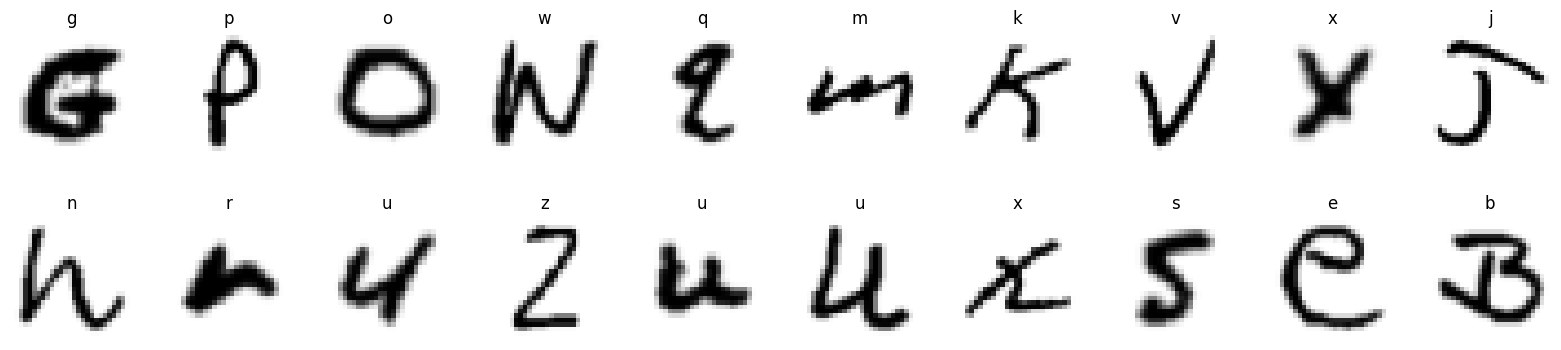

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt

n_rows = 2
n_cols = 10
plt.figure(figsize=(n_cols * 2, n_rows * 2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_new[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(classes[y_new[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [13]:
from sklearn.metrics import classification_report

# Ora si effettua la predizione su tutto il test set
y_pred = np.argmax(lenet.predict(X_test), axis=-1)

print(classification_report(y_test, y_pred))

275/275 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       340
           1       0.95      0.94      0.95       313
           2       0.94      0.96      0.95       365
           3       0.98      0.95      0.96       334
           4       0.96      0.93      0.94       330
           5       0.96      0.96      0.96       320
           6       0.92      0.75      0.83       329
           7       0.93      0.95      0.94       355
           8       0.75      0.77      0.76       349
           9       0.95      0.95      0.95       364
          10       0.98      0.95      0.97       339
          11       0.73      0.76      0.75       341
          12       0.99      0.96      0.98       356
          13       0.91      0.96      0.93       315
          14       0.97      0.98      0.97       327
          15       0.99      0.96      0.98       350
          16       0.83   